# Add `stackstac` keyword arguments

In this tutorial we will learn how to pass `stackstac` arguments to `cubo`.

In [1]:
import cubo

The following chunk doesn's pass any argument to `stackstac`, creating the cube using the default values:

In [2]:
da = cubo.create(
    lat=51.079225, # Central latitude of the cube
    lon=10.452173, # Central longitude of the cube
    collection="sentinel-2-l2a", # Name of the STAC collection
    bands=["B02","B03","B04"], # Bands to retrieve
    start_date="2021-06-01", # Start date of the cube
    end_date="2021-07-01", # End date of the cube
    edge_size=64, # Edge size of the cube (px)
    resolution=20, # Pixel size of the cube (m)
    query={"eo:cloud_cover": {"lt": 10}} # kwarg for pystac-client
)
da

/home/dmontero/anaconda3/envs/cubo/lib/python3.9/site-packages/stackstac/prepare.py:364: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  times = pd.to_datetime(


<xarray.DataArray 'sentinel-2-l2a' (time: 2, band: 3, y: 64, x: 64)>
dask.array<fetch_raster_window, shape=(2, 3, 64, 64), dtype=float64, chunksize=(1, 1, 64, 64), chunktype=numpy.ndarray>
Coordinates: (12/47)
  * time                                     (time) datetime64[ns] 2021-06-13...
    id                                       (time) <U54 'S2B_MSIL2A_20210613...
  * band                                     (band) <U3 'B02' 'B03' 'B04'
  * x                                        (x) float64 6.011e+05 ... 6.023e+05
  * y                                        (y) float64 5.66e+06 ... 5.659e+06
    sat:orbit_state                          <U10 'descending'
    ...                                       ...
    title                                    (band) <U20 'Band 2 - Blue - 10m...
    common_name                              (band) <U5 'blue' 'green' 'red'
    center_wavelength                        (band) float64 0.49 0.56 0.665
    full_width_half_max                      (band) float64 0.098 0.045 0.038
    epsg                                     int64 32632
    cubo:distance_from_center                (y, x) float64 908.2 ... 873.7
Attributes:
    collection:           sentinel-2-l2a
    stac:                 https://planetarycomputer.microsoft.com/api/stac/v1
    epsg:                 32632
    resolution:           20
    edge_size:            64
    central_lat:          51.079225
    central_lon:          10.452173
    central_y:            5659638.0946523
    central_x:            601722.4825156148
    time_coverage_start:  2021-06-01
    time_coverage_end:    2021-07-01

Let's visualize an image:

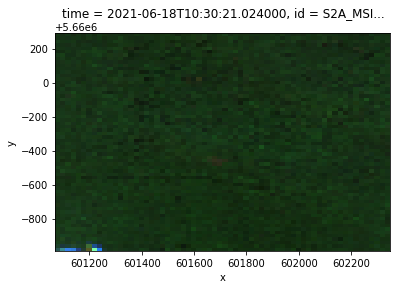

In [3]:
(da.sel(band=["B04","B03","B02"])[1]/2000).clip(0,1).plot.imshow()

Now, let's modify these default values by passing the required modifications as a dictionary.

In [4]:
from rasterio.enums import Resampling

da = cubo.create(
    lat=51.079225, # Central latitude of the cube
    lon=10.452173, # Central longitude of the cube
    collection="sentinel-2-l2a", # Name of the STAC collection
    bands=["B02","B03","B04"], # Bands to retrieve
    start_date="2021-06-01", # Start date of the cube
    end_date="2021-07-01", # End date of the cube
    edge_size=64, # Edge size of the cube (px)
    resolution=20, # Pixel size of the cube (m)
    query={"eo:cloud_cover": {"lt": 10}}, # kwarg for pystac-client
    stackstac_kw=dict( # stackstac keyword arguments
        xy_coords='center',
        resampling=Resampling.bilinear)
)
da

/home/dmontero/anaconda3/envs/cubo/lib/python3.9/site-packages/stackstac/prepare.py:364: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  times = pd.to_datetime(


<xarray.DataArray 'sentinel-2-l2a' (time: 2, band: 3, y: 64, x: 64)>
dask.array<fetch_raster_window, shape=(2, 3, 64, 64), dtype=float64, chunksize=(1, 1, 64, 64), chunktype=numpy.ndarray>
Coordinates: (12/47)
  * time                                     (time) datetime64[ns] 2021-06-13...
    id                                       (time) <U54 'S2B_MSIL2A_20210613...
  * band                                     (band) <U3 'B02' 'B03' 'B04'
  * x                                        (x) float64 6.011e+05 ... 6.024e+05
  * y                                        (y) float64 5.66e+06 ... 5.659e+06
    sat:orbit_state                          <U10 'descending'
    ...                                       ...
    title                                    (band) <U20 'Band 2 - Blue - 10m...
    common_name                              (band) <U5 'blue' 'green' 'red'
    center_wavelength                        (band) float64 0.49 0.56 0.665
    full_width_half_max                      (band) float64 0.098 0.045 0.038
    epsg                                     int64 32632
    cubo:distance_from_center                (y, x) float64 894.1 ... 887.9
Attributes:
    collection:           sentinel-2-l2a
    stac:                 https://planetarycomputer.microsoft.com/api/stac/v1
    epsg:                 32632
    resolution:           20
    edge_size:            64
    central_lat:          51.079225
    central_lon:          10.452173
    central_y:            5659638.0946523
    central_x:            601722.4825156148
    time_coverage_start:  2021-06-01
    time_coverage_end:    2021-07-01

Now let's visualize the same image:

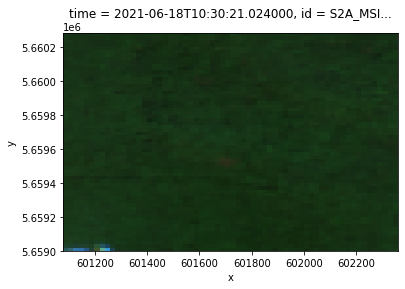

In [5]:
(da.sel(band=["B04","B03","B02"])[1]/2000).clip(0,1).plot.imshow()